# (19) new fine parc (512)

**Motivation**: Fit parcellation, and do the rest. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Create new 512 parcellation

In [2]:
mice = Mice(512)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
%%time

mice.parcel.fit_parcel(frac=0.4)

Parcellation not found, initiating fit

[PROGRESS] fit columnar: initiated

[PROGRESS] kmeans fit: done

[PROGRESS] save 2D, 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] save 3D, 10um: done

[PROGRESS] downsample: done

Warning! missing regions:
'[1431, 2931, 2951, 2967]'

num regions,    left: 1533,  right: 1533
region id diff,         r - l:  Counter({1536: 1533})

[PROGRESS] fit columnar: done

[PROGRESS] fit subcortical: initiated

[PROGRESS] fit subcortical: done

[PROGRESS] create regions df: done

[PROGRESS] erode: done

[PROGRESS] 'cols_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'brain_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'brain-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'regions.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] 'fit_meta.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/parcellation

[PROGRESS] save results: done.

CPU times: user 3h 57min 48s, sys: 45min 42s, total: 4h 43min 30s
Wall time: 21min 45s


In [4]:
sum(mice.parcel.fit_meta['subctx_num'].values())

1621

In [5]:
len(unique_idxs(mice.parcel['brain']))

6282

In [6]:
len(unique_idxs(mice.parcel['brain'])) - 512 * 3 * 2

3210

In [10]:
512 * 3 - 1533

3

In [12]:
df = mice.parcel.df.copy()

In [36]:
ids_ctx = df.loc[df['acro'] == 'Isocortex', 'id'].values
ids_subctx = df.loc[df['acro'] != 'Isocortex', 'id'].values

len(ids_ctx), len(ids_subctx)

(3072, 3216)

In [37]:
len(ids_cortex) / 2

1536.0

In [38]:
512 * 3

1536

In [39]:
ids_present = unique_idxs(mice.parcel['brain'])

In [40]:
intersection = set(ids_present).intersection(ids_ctx)
intersection = sorted(intersection)
len(intersection)

3066

In [41]:
3066 / 2

1533.0

In [42]:
delta = sorted(set(ids_ctx).difference(ids_present))
delta

[1395, 1415, 1431, 2931, 2951, 2967]

Warning! missing regions:

[1431, 2931, 2951, 2967]

In [43]:
df.loc[df['id'].isin(delta)]

,id,acro,hemis,region,layer
1394,1395,Isocortex,1,371,2
1414,1415,Isocortex,1,391,2
1430,1431,Isocortex,1,407,2
2930,2931,Isocortex,2,371,2
2950,2951,Isocortex,2,391,2
2966,2967,Isocortex,2,407,2


## Do the masks

In [2]:
from register.register import Register

mice = Mice(512, full_load=True, load_allen=True, load_parcel=True)
reg = Register(mice)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
obj_all = reg.register_anat(
    save_results=True,
    anchor_ses=2,
)

100%|██████████| 10/10 [15:24<00:00, 92.47s/it]


Next, I copied masks to Yale server, ran ```./do_xform.sh```, and copied the resulting 2d masks back to my local computer.

### Test ```get_accepted_regions()``` again

In [3]:
mode = 'ca2'
reg.set_mode(mode)
accepted = reg.get_accepted_regions()

Name: cols . . . a total of: 480 regions accepted, 234 regions rejected.
accept ratio: 67.23 %, reject ratio: 32.77 %, using a presence threshold of 50.0 %

In [4]:
top, flat = mice.parcel.load_top_flat()

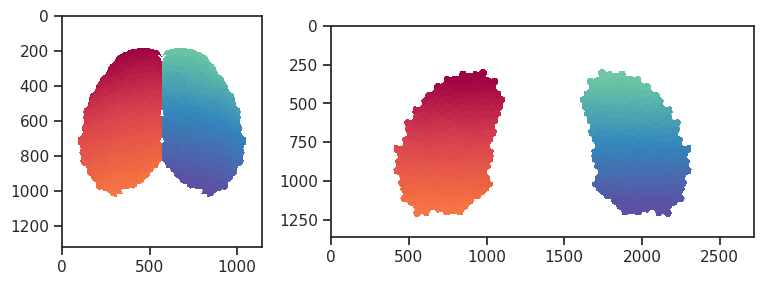

In [17]:
fig, axes = create_figure(1, 2, (9, 3), width_ratios=[1, 2.0])
axes[0].imshow(mwh(~np.isin(top, accepted['acc']), top), cmap='Spectral')
axes[1].imshow(mwh(~np.isin(flat, accepted['acc']), flat), cmap='Spectral')
# remove_ticks(axes)
plt.show()

In [18]:
mode = 'bold'
reg.set_mode(mode)
accepted = reg.get_accepted_regions()

Name: brain . . . a total of: 5779 regions accepted, 503 regions rejected.
accept ratio: 91.99 %, reject ratio: 8.01 %, using a presence threshold of 50.0 %

## Check again: ```get_tsnr_masks()```

### q_bold = 0.05

In [19]:
tsnr_masks = reg.get_tsnr_masks(0.05)

Name: brain . . . a total of: 5779 regions accepted, 503 regions rejected.
accept ratio: 91.99 %, reject ratio: 8.01 %, using a presence threshold of 50.0 %

In [20]:
portion_rois = {}
for k, m in tsnr_masks['bold'].items():
    key = mice.get_key(*mice.looper[k][:2])
    f = f"{key}_space-indiv3d_eroded.nii.gz"
    f = pjoin(mice.cfg.masks_dir, f)
    obj = ants.image_read(f).numpy().astype(int)
    portion_rois[k] = len(unique_idxs(obj[m])) / len(unique_idxs(obj))

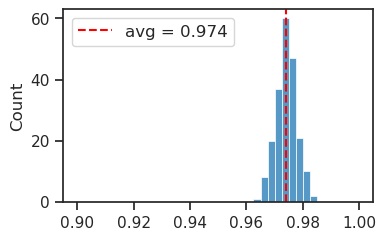

In [21]:
fig, ax = create_figure(1, 1, (4, 2.5))
sns.histplot(list(portion_rois.values()), bins=np.linspace(0.9, 1, 41), ax=ax)
_x = np.mean(list(portion_rois.values()))
ax.axvline(_x, color='r', ls='--', label=f"avg = {_x:0.3f}")
ax.legend(loc='upper left', fontsize=12)
plt.show()

### q_bold = 0.1

In [22]:
tsnr_masks = reg.get_tsnr_masks(0.1)

Name: brain . . . a total of: 5779 regions accepted, 503 regions rejected.
accept ratio: 91.99 %, reject ratio: 8.01 %, using a presence threshold of 50.0 %

In [23]:
portion_rois = {}
for k, m in tsnr_masks['bold'].items():
    key = mice.get_key(*mice.looper[k][:2])
    f = f"{key}_space-indiv3d_eroded.nii.gz"
    f = pjoin(mice.cfg.masks_dir, f)
    obj = ants.image_read(f).numpy().astype(int)
    portion_rois[k] = len(unique_idxs(obj[m])) / len(unique_idxs(obj))

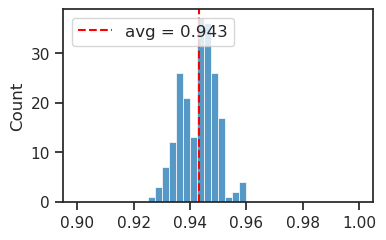

In [24]:
fig, ax = create_figure(1, 1, (4, 2.5))
sns.histplot(list(portion_rois.values()), bins=np.linspace(0.9, 1, 41), ax=ax)
_x = np.mean(list(portion_rois.values()))
ax.axvline(_x, color='r', ls='--', label=f"avg = {_x:0.3f}")
ax.legend(loc='upper left', fontsize=12)
plt.show()

## Verify ```setup_preproc_data()```

In [23]:
mice = Mice(512)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [24]:
mice.setup_preproc_data(desc={'ca': 'preproc', 'bold': 'rabies'})
ca_descs = []
for k, f in mice.ca_preproc.items():
    try:
        ca_descs.append(next(
            e for e in f.nii_file.split('_')
            if 'desc' in e
        ).split('-')[1])
    except AttributeError:
        continue
collections.Counter(ca_descs)

Counter({'preproc': 202})

In [25]:
mice.setup_preproc_data(desc={'ca': 'preproc', 'bold': 'raw'})

bold_descs = []
for k, f in mice.bold_preproc.items():
    try:
        bold_descs.append(next(
            e for e in f.nii_file.split('_')
            if 'desc' in e
        ))
    except AttributeError:
        continue
collections.Counter(bold_descs)

Counter({'desc-raw': 206})

In [26]:
mice.setup_preproc_data(desc={'ca': 'preproc', 'bold': 'rabies'})

bold_descs = []
for k, f in mice.bold_preproc.items():
    try:
        bold_descs.append(next(
            e for e in f.nii_file.split('_')
            if 'desc' in e
        ))
    except AttributeError:
        continue
collections.Counter(bold_descs)

Counter({'desc-rabies': 201})

In [27]:
mice.setup_preproc_data(desc={'ca': 'preproc', 'bold': 'rabies-hp'})

bold_descs = []
for k, f in mice.bold_preproc.items():
    try:
        bold_descs.append(next(
            e for e in f.nii_file.split('_')
            if 'desc' in e
        ))
    except AttributeError:
        continue
collections.Counter(bold_descs)

Counter({'desc-rabies-hp': 200})

## Save tmask

In [13]:
# HIDE CODE


def _save_tmask(csv_files, file_name):
    looper = itertools.product(
        range(1, 10 + 1),
        range(1, 3 + 1),
        range(1, 7 + 1),
    )
    dlist = []
    for sub, ses, run in looper:
        patterns = [
            f"sub-SLC{sub:02d}",
            f"ses-{ses:d}",
            f"run-{run:d}",
        ]
        key = '_'.join(patterns)
        try:
            f = next(
                e for e in csv_files if
                all(k in e for k in patterns)
            )
            vals = pd.read_csv(f).values.ravel()
            dlist.append({
                'sub': [sub] * len(vals),
                'ses': [ses] * len(vals),
                'run': [run] * len(vals),
                'key': [key] * len(vals),
                'temporal_mask': vals.astype(int),
            })
        except StopIteration:
            print(f"Warning, missing:\t{key}")

    df = pd.DataFrame(merge_dicts(dlist))
    _ = save_obj(
        obj=df,
        file_name=file_name,
        save_dir=meta_dir,
        mode='df',
    )
    return df

In [14]:
mice = Mice(512)
meta_dir = pjoin(mice.cfg.base_dir, 'meta_info')

### Highpass

In [15]:
pth = '/mnt/storage/hadi/Ca-fMRI/gabe_data/reoriented_data_highpass'
csv_files = []
for p in pathlib.Path(pth).rglob('*.csv'):
    csv_files.append(str(p))
len(csv_files)

200

In [16]:
df = _save_tmask(csv_files, 'tmask_hp')

Warning, missing:       sub-SLC01_ses-1_run-4

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC03_ses-3_run-2

Warning, missing:       sub-SLC04_ses-3_run-2

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC07_ses-1_run-6

Warning, missing:       sub-SLC07_ses-2_run-1

Warning, missing:       sub-SLC08_ses-1_run-7

Warning, missing:       sub-SLC10_ses-1_run-5

[PROGRESS] 'tmask_hp.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

### No bandpass

In [17]:
pth = '/mnt/storage/hadi/Ca-fMRI/gabe_data/reoriented_data'
csv_files = []
for p in pathlib.Path(pth).rglob('*.csv'):
    csv_files.append(str(p))
len(csv_files)

201

In [18]:
df = _save_tmask(csv_files, 'tmask')

Warning, missing:       sub-SLC01_ses-1_run-4

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC03_ses-3_run-2

Warning, missing:       sub-SLC04_ses-3_run-2

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC07_ses-1_run-6

Warning, missing:       sub-SLC07_ses-2_run-1

Warning, missing:       sub-SLC08_ses-1_run-7

[PROGRESS] 'tmask.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

## Check one tmask (hp)

In [21]:
pth = '/home/hadi/Documents/Ca-fMRI/meta_info'
df = pd.read_pickle(pjoin(pth, 'tmask_hp.df'))
present = df['key'].unique()
missing = []
for sub in range(1, 10 + 1):
    for ses in range(1, 3 + 1):
        for run in range(1, 7 + 1):
            key = f"sub-SLC{sub:02d}_ses-{ses}_run-{run}"
            if key not in present:
                missing.append(key)
missing

[
    'sub-SLC01_ses-1_run-4',
    'sub-SLC03_ses-1_run-1',
    'sub-SLC03_ses-3_run-2',
    'sub-SLC04_ses-3_run-2',
    'sub-SLC05_ses-1_run-5',
    'sub-SLC06_ses-3_run-2',
    'sub-SLC07_ses-1_run-6',
    'sub-SLC07_ses-2_run-1',
    'sub-SLC08_ses-1_run-7',
    'sub-SLC10_ses-1_run-5'
]

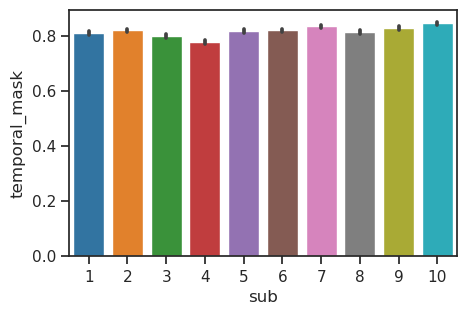

In [22]:
sns.barplot(data=df, x='sub', y='temporal_mask')
plt.show()

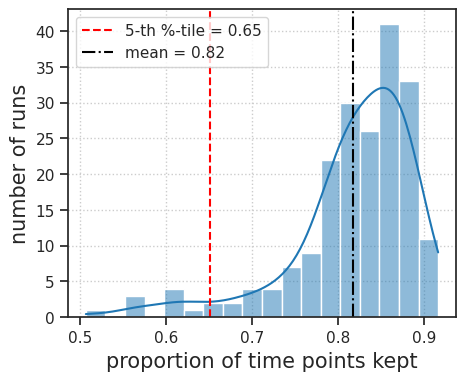

In [23]:
df = df.groupby(['key']).mean()

fig, ax = create_figure(1, 1, (5, 4))

sns.histplot(df, x='temporal_mask', kde=True, ax=ax)
q = df['temporal_mask'].quantile(q=0.05)
ax.axvline(q, color='r', ls='--', label=f'5-th %-tile = {q:0.2f}')
q = df['temporal_mask'].mean()
ax.axvline(q, color='k', ls='-.', label=f'mean = {q:0.2f}')
ax.set_xlabel('proportion of time points kept', fontsize=15)
ax.set_ylabel('number of runs', fontsize=15)
ax.grid()
ax.legend()

plt.show()

In [25]:
df

,sub,ses,run,key,temporal_mask
0,1,1,1,sub-SLC01_ses-1_run-1,0
1,1,1,1,sub-SLC01_ses-1_run-1,0
2,1,1,1,sub-SLC01_ses-1_run-1,0
3,1,1,1,sub-SLC01_ses-1_run-1,0
4,1,1,1,sub-SLC01_ses-1_run-1,0
...,...,...,...,...,...
119995,10,3,7,sub-SLC10_ses-3_run-7,0
119996,10,3,7,sub-SLC10_ses-3_run-7,0
119997,10,3,7,sub-SLC10_ses-3_run-7,0
119998,10,3,7,sub-SLC10_ses-3_run-7,0
